In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

# Standard plotly imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.set_option('display.max_columns', 40)

# Datos de todo el país (Datos Abiertos - Dirección General de Epidemiología)

In [2]:
# Reading csv data
datos_covid19 = pd.read_csv('200615COVID19MEXICO.csv', encoding = "latin")

In [3]:
# Cleaning column names
nom_columnas = datos_covid19.columns.str.lower()
datos_covid19.columns = nom_columnas
datos_covid19 = datos_covid19.set_index('id_registro')
datos_covid19.head()

,fecha_actualizacion,origen,sector,entidad_um,sexo,entidad_nac,entidad_res,municipio_res,tipo_paciente,fecha_ingreso,fecha_sintomas,fecha_def,intubado,neumonia,edad,nacionalidad,embarazo,habla_lengua_indig,diabetes,epoc,asma,inmusupr,hipertension,otra_com,cardiovascular,obesidad,renal_cronica,tabaquismo,otro_caso,resultado,migrante,pais_nacionalidad,pais_origen,uci
id_registro,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109376,2020-06-15,2,3,27,1,27,27,2,1,2020-05-02,2020-05-01,9999-99-99,97,2,80,1,2,2,1,2,2,2,2,2,2,2,2,2,1,1,99,MÃ©xico,99,97
0463de,2020-06-15,2,4,29,1,29,29,33,1,2020-04-21,2020-04-21,9999-99-99,97,2,38,1,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,MÃ©xico,99,97
0114ce,2020-06-15,2,4,2,2,14,2,4,2,2020-04-21,2020-04-16,9999-99-99,2,1,52,1,97,2,2,2,2,2,1,2,2,2,2,2,99,1,99,MÃ©xico,99,2
0a8e23,2020-06-15,2,4,13,2,13,13,8,2,2020-04-24,2020-04-20,9999-99-99,2,2,34,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,MÃ©xico,99,2
10c367,2020-06-15,2,4,15,2,9,15,33,2,2020-04-25,2020-04-17,9999-99-99,2,2,43,1,97,2,1,1,1,1,1,1,1,1,1,1,99,1,99,MÃ©xico,99,2


In [4]:
# Total observations
print('Observaciones totales:', datos_covid19.shape[0])

Observaciones totales: 415097


In [5]:
datos_covid19.dtypes

fecha_actualizacion    object
origen                  int64
sector                  int64
entidad_um              int64
sexo                    int64
entidad_nac             int64
entidad_res             int64
municipio_res           int64
tipo_paciente           int64
fecha_ingreso          object
fecha_sintomas         object
fecha_def              object
intubado                int64
neumonia                int64
edad                    int64
nacionalidad            int64
embarazo                int64
habla_lengua_indig      int64
diabetes                int64
epoc                    int64
asma                    int64
inmusupr                int64
hipertension            int64
otra_com                int64
cardiovascular          int64
obesidad                int64
renal_cronica           int64
tabaquismo              int64
otro_caso               int64
resultado               int64
migrante                int64
pais_nacionalidad      object
pais_origen            object
uci       

In [6]:
#Cleaning dateTime variables
for column in ['fecha_actualizacion','fecha_ingreso','fecha_sintomas']:
    datos_covid19[column] = pd.to_datetime(datos_covid19[column], format = '%Y-%m-%d')
    
def transformDate(date):
    if date == '9999-99-99':
        date = np.nan
    return date
datos_covid19['fecha_def'] = pd.to_datetime(datos_covid19['fecha_def'].apply(transformDate), format = '%Y-%m-%d')

datos_covid19.dtypes

fecha_actualizacion    datetime64[ns]
origen                          int64
sector                          int64
entidad_um                      int64
sexo                            int64
entidad_nac                     int64
entidad_res                     int64
municipio_res                   int64
tipo_paciente                   int64
fecha_ingreso          datetime64[ns]
fecha_sintomas         datetime64[ns]
fecha_def              datetime64[ns]
intubado                        int64
neumonia                        int64
edad                            int64
nacionalidad                    int64
embarazo                        int64
habla_lengua_indig              int64
diabetes                        int64
epoc                            int64
asma                            int64
inmusupr                        int64
hipertension                    int64
otra_com                        int64
cardiovascular                  int64
obesidad                        int64
renal_cronic

---

# Datos del Estado de México

In [7]:
# Mexico State, total observations (indentification number: 15)
datos_covid19_eMex = datos_covid19[datos_covid19['entidad_res'] == 15]
print('Observaciones en el Estado de Mexico:', datos_covid19_eMex.shape[0])

Observaciones en el Estado de Mexico: 58860


Resultados positivos: 23726
Resultados negativos: 25275
Resultados pendientes: 9859



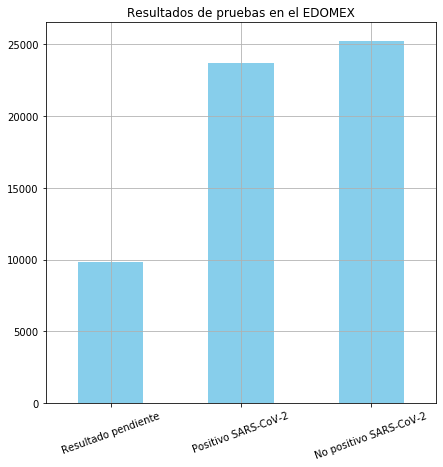

In [8]:
#Obtaining positive, negative and pending cases of Covid 19 in Mexico State
#Not using groupby to store the actual data
pos_datos_covid19_eMex = datos_covid19_eMex[datos_covid19_eMex['resultado'] == 1]
neg_datos_covid19_eMex = datos_covid19_eMex[datos_covid19_eMex['resultado'] == 2]
pen_datos_covid19_eMex = datos_covid19_eMex[datos_covid19_eMex['resultado'] == 3]

print('Resultados positivos:', pos_datos_covid19_eMex.shape[0])
print('Resultados negativos:', neg_datos_covid19_eMex.shape[0])
print('Resultados pendientes:', pen_datos_covid19_eMex.shape[0])

#Plotting results
res_pruebas_covid = datos_covid19_eMex.groupby('resultado').count().sort_values(by = 'resultado')
res_pruebas_covid.index = ['Positivo SARS-CoV-2', 'No positivo SARS-CoV-2', 'Resultado pendiente']
res_pruebas_covid.sort_values(by = [res_pruebas_covid.columns[0]]).iloc[:,0].plot(kind = 'bar', 
                                                                                  rot = 20,
                                                                                  color = 'skyblue',
                                                                                  title = 'Resultados de pruebas en el EDOMEX',
                                                                                  figsize = (7,7),
                                                                                  grid = True)
print()

In [9]:
# Obtaining description of variables
diccionarios = pd.ExcelFile('diccionario_datos_covid19/Catalogos_0412.xlsx')

In [10]:
diccionarios.sheet_names

['Catálogo ORIGEN',
 'Catálogo SECTOR',
 'Catálogo SEXO',
 'Catálogo TIPO_PACIENTE',
 'Catálogo SI_NO',
 'Catálogo NACIONALIDAD',
 'Catálogo RESULTADO',
 'Catálogo de ENTIDADES',
 'Catálogo MUNICIPIOS']

In [11]:
dicc_municipios = diccionarios.parse('Catálogo MUNICIPIOS')
dicc_municipios_eMex = dicc_municipios[dicc_municipios.CLAVE_ENTIDAD == 15]
dicc_municipios_eMex = dicc_municipios_eMex.drop(columns=['CLAVE_ENTIDAD'])
dicc_municipios_eMex = dicc_municipios_eMex.set_index('CLAVE_MUNICIPIO')
dicc_municipios_eMex

,MUNICIPIO
CLAVE_MUNICIPIO,
1,ACAMBAY DE RUÍZ CASTAÑEDA
2,ACOLMAN
3,ACULCO
4,ALMOLOYA DE ALQUISIRAS
5,ALMOLOYA DE JUÁREZ
...,...
122,VALLE DE CHALCO SOLIDARIDAD
123,LUVIANOS
124,SAN JOSÉ DEL RINCÓN


Total de Municipios: 125
Total de personas con Municipio "NO ESPECIFICADO": 0


resultado,Positivo SARS-CoV-2,No positivo SARS-CoV-2,Resultado pendiente
MUNICIPIO,,,
NEZAHUALCÓYOTL,2823.0,2776.0,833.0
ECATEPEC DE MORELOS,2783.0,2587.0,855.0
NAUCALPAN DE JUÁREZ,1565.0,1576.0,816.0
TLALNEPANTLA DE BAZ,1531.0,1583.0,425.0
TOLUCA,1446.0,1895.0,1065.0
CHALCO,1117.0,908.0,377.0
CHIMALHUACÁN,1044.0,846.0,251.0
IXTAPALUCA,872.0,671.0,214.0
TULTITLÁN,703.0,521.0,235.0


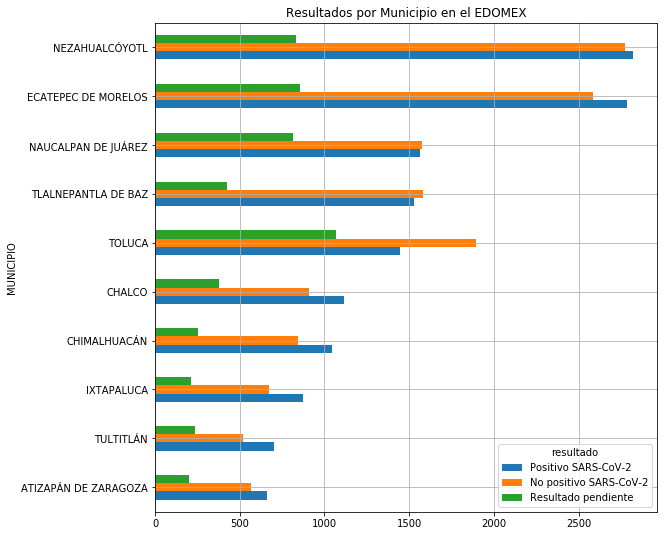

In [12]:
# Graphing cases by "municipio"
# Municipios: 1-125, No especificado: 999
resultados_por_municipio = pd.pivot_table(datos_covid19_eMex, index = 'municipio_res', 
                                           columns = 'resultado', values = 'origen', aggfunc=len)
resultados_por_municipio.rename(columns = {1:'Positivo SARS-CoV-2', 
                                           2:'No positivo SARS-CoV-2', 
                                           3:'Resultado pendiente'},
                                inplace = True)

top10_resultados_por_municipio = resultados_por_municipio.sort_values(by = 'Positivo SARS-CoV-2', 
                                                                      ascending = False).iloc[:10,:]
label_num = top10_resultados_por_municipio.index
label_text = dicc_municipios_eMex.loc[label_num,'MUNICIPIO']
top10_resultados_por_municipio.index = label_text

grafica_por_municipio = top10_resultados_por_municipio.sort_values(by = 
                                                                   'Positivo SARS-CoV-2').plot(kind = 'barh',
                                                                                               figsize = (9,9),
                                                                                               grid = True)
grafica_por_municipio.set_title('Resultados por Municipio en el EDOMEX')
print('Total de Municipios:', len(datos_covid19_eMex['municipio_res'].unique()))
print('Total de personas con Municipio "NO ESPECIFICADO":', sum(datos_covid19_eMex['municipio_res'] == 999))
top10_resultados_por_municipio

In [16]:
casos_por_dia = pos_datos_covid19_eMex.groupby(['fecha_ingreso']).count().iloc[:,0].rename('casos_por_dia')
casos_acumulados= pos_datos_covid19_eMex.groupby(['fecha_ingreso']).count().iloc[:,0].cumsum().rename('casos_acumulados')

In [83]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
                x = casos_acumulados.index,
                y = casos_acumulados.values,
                mode='lines+markers',
                name = "Acumulados",
                line = dict(color='#330C73')),
             secondary_y=False)

fig.add_trace(go.Histogram(
                x = pos_datos_covid19_eMex.fecha_ingreso,
                name = 'Diarios',
                marker_color='#EB89B5',
                opacity=0.5),
             secondary_y=True)


fig.update_layout(
    title="Casos acumulados y nuevos por día",
    xaxis_title="Fecha",
    showlegend = True,
    bargap=0.1,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)

# Set y-axes titles
fig.update_yaxes(title_text="Casos acumulados", secondary_y=False)
fig.update_yaxes(title_text="Casos diarios", secondary_y=True)

fig.show()

In [47]:
casos_por_edad = pos_datos_covid19_eMex.groupby("edad").count().iloc[:,0].rename('casos_por_edad')

In [78]:
bin_size = 3
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(
                x = pos_datos_covid19_eMex[pos_datos_covid19_eMex.sexo == 2].edad,
                name = 'Hombres',
                marker_color='#330C73',
                opacity=0.7,
                xbins={"size": bin_size},
                bingroup = 1))

fig.add_trace(go.Histogram(
                x = pos_datos_covid19_eMex[pos_datos_covid19_eMex.sexo == 1].edad,
                name = 'Mujeres',
                marker_color='#EB89B5',
                opacity=0.4,
                xbins={"size": bin_size},
                bingroup = 1))

fig.update_layout(
    title="Casos por edad",
    xaxis_title="Edad",
    yaxis_title="Total de casos positivos",
    barmode="overlay",
    bargap=0.05,
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="#7f7f7f"
    )
)
fig.update_xaxes(nticks=25)
